In [16]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
import cv2
 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) 
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255

X_train_resized = [cv2.resize(elem,(128,128)) for elem in X_train]
X_test_resized = [cv2.resize(elem,(128,128)) for elem in X_test]
print(type(X_train_resized))
#print(X_train_resized.shape)
X_train = np.asarray(X_train_resized)
X_test = np.asarray(X_test_resized)
print(type(X_train))
print(X_train.shape)

<class 'list'>
<class 'numpy.ndarray'>
(60000, 128, 128)


In [17]:
X_train.shape

(60000, 128, 128)

In [18]:
X_test.shape
X_test[0].shape

(128, 128)

In [19]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
 
model = Sequential()
model.add(Conv2D(input_shape=(128,128,1),filters=4,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=4,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=8, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))



In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 128, 128, 4)       40        
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 4)       148       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 4)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 4)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 8)         296       
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 8)         584       
                                                      

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
res = model.fit(X_train, Y_train, 
          batch_size=64, epochs=50,validation_split=0.3,verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)

Epoch 1/50
657/657 [==============================] - 20s 28ms/step - loss: 0.8348 - accuracy: 0.7203 - val_loss: 0.0999 - val_accuracy: 0.9714
Epoch 2/50
657/657 [==============================] - 20s 30ms/step - loss: 0.1771 - accuracy: 0.9500 - val_loss: 0.0730 - val_accuracy: 0.9796
Epoch 3/50
657/657 [==============================] - 19s 29ms/step - loss: 0.1257 - accuracy: 0.9650 - val_loss: 0.0702 - val_accuracy: 0.9817
Epoch 4/50
657/657 [==============================] - 18s 27ms/step - loss: 0.1042 - accuracy: 0.9698 - val_loss: 0.0831 - val_accuracy: 0.9845
Epoch 5/50
657/657 [==============================] - 18s 27ms/step - loss: 0.0916 - accuracy: 0.9742 - val_loss: 0.0441 - val_accuracy: 0.9868
Epoch 6/50
657/657 [==============================] - 19s 29ms/step - loss: 0.0793 - accuracy: 0.9779 - val_loss: 0.0399 - val_accuracy: 0.9882
Epoch 7/50
657/657 [==============================] - 18s 27ms/step - loss: 0.0712 - accuracy: 0.9794 - val_loss: 0.0407 - val_accuracy:

In [22]:
print(score)

[0.025189554318785667, 0.9934999942779541]


In [23]:
model.save("/content/")

In [24]:
preds = model.predict(X_test)


In [25]:
np.argmax(preds[50])

6

In [26]:
wrong_preds=[]
for i in range(len(preds)):
  if np.argmax(preds[i]) != np.argmax(Y_test[i]): 
    wrong_preds.append(i)

len(wrong_preds)

65

In [27]:
wrong_preds[:10]

[247, 359, 400, 582, 659, 674, 691, 740, 938, 947]

exact value -  4
predicted value -  4


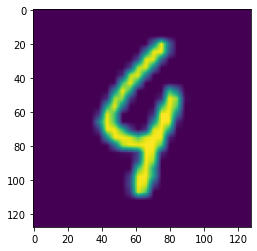

In [28]:
x=115
plt.imshow(X_test[x])
print('exact value - ', np.argmax(Y_test[x]))
print('predicted value - ', np.argmax(preds[x]))

In [29]:
res.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

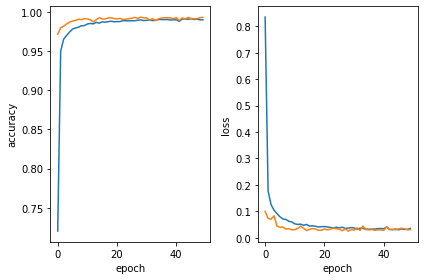

In [30]:
plt.subplot(1,2,1)
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.subplot(1,2,2)
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.tight_layout()